### Correlation between each coverage metric (Metric 1&2) and test suite effectiveness (Metric 3). 

The rationale is that test suites with higher coverage might show better test suite effectiveness.

### Project: Apache commons-collections

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr
sns.set()

### Step 1. Reading, merging data files and data pre-processing

In [92]:
# read csv of metric 1, 2 and print record count.
df1 = pd.read_csv("commons-collection-jacoco.csv")
df1 = df1.sort_values('CLASS')
print(df1.count())
df1.head()

GROUP                  473
PACKAGE                473
CLASS                  473
INSTRUCTION_MISSED     473
INSTRUCTION_COVERED    473
BRANCH_MISSED          473
BRANCH_COVERED         473
LINE_MISSED            473
LINE_COVERED           473
COMPLEXITY_MISSED      473
COMPLEXITY_COVERED     473
METHOD_MISSED          473
METHOD_COVERED         473
dtype: int64


,GROUP,PACKAGE,CLASS,INSTRUCTION_MISSED,INSTRUCTION_COVERED,BRANCH_MISSED,BRANCH_COVERED,LINE_MISSED,LINE_COVERED,COMPLEXITY_MISSED,COMPLEXITY_COVERED,METHOD_MISSED,METHOD_COVERED
48,Apache Commons Collections,org.apache.commons.collections4.bag,AbstractBagDecorator,9,39,0,4,3,8,2,9,2,7
194,Apache Commons Collections,org.apache.commons.collections4.bidimap,AbstractBidiMapDecorator,13,17,0,0,3,5,3,4,3,4
81,Apache Commons Collections,org.apache.commons.collections4.trie,AbstractBitwiseTrie,17,113,5,15,4,24,5,15,1,9
74,Apache Commons Collections,org.apache.commons.collections4.trie,AbstractBitwiseTrie.BasicEntry,23,73,2,10,5,21,4,11,2,7
10,Apache Commons Collections,org.apache.commons.collections4.collection,AbstractCollectionDecorator,3,89,0,2,2,24,1,19,1,18


In [93]:
# read csv of metric 3 and print record count.
df2 = pd.read_csv("commons-collection-mutation.csv" )
df2.rename(columns={'Class':'CLASS','Package':'PACKAGE'},inplace=True)
df2['CLASS'] = df2['CLASS'].str.replace('.java', '', case=False)
df2 = df2.sort_values('CLASS')
print(df2.count())
df2.head()

CLASS             267
PACKAGE           267
KILLED            267
MEMORY_ERROR      267
NO_COVERAGE       267
SURVIVED          267
TIMED_OUT         267
Total_Mutant      267
Mutation_Score    267
dtype: int64


,CLASS,PACKAGE,KILLED,MEMORY_ERROR,NO_COVERAGE,SURVIVED,TIMED_OUT,Total_Mutant,Mutation_Score
0,AbstractBagDecorator,org.apache.commons.collections4.bag,7,0,3,1,0,11,63.636364
1,AbstractBidiMapDecorator,org.apache.commons.collections4.bidimap,0,0,5,1,0,6,0.000000
2,AbstractBitwiseTrie,org.apache.commons.collections4.trie,1,0,26,13,0,40,2.500000
3,AbstractCollectionDecorator,org.apache.commons.collections4.collection,23,0,0,3,0,26,88.461538
4,AbstractDualBidiMap,org.apache.commons.collections4.bidimap,11,0,91,11,0,113,9.734513


In [97]:
def parse_class_values(dataframe):
    dataframe['CLASS'] = dataframe['CLASS'].map(lambda x:  x if (x.find('.') == -1) else  x[:x.find('.')] )
    dataframe = dataframe.groupby(dataframe['CLASS']).aggregate(sum).reset_index()
    return dataframe

In [98]:
def inner_join_dataframes(dataframe1, dataframe2):
    data =  pd.merge(left=dataframe1,right=dataframe2, left_on='CLASS', right_on='CLASS')
    return data

In [99]:
# parse class values and group common classes in df1 - metric 1,2
df1 = parse_class_values(df1)
df1 = df1.sort_values('CLASS')

#calculate Statement Coverage
df1['STATEMENT_COVERAGE'] =  (df1['LINE_COVERED'] / (df1['LINE_COVERED'] + df1['LINE_MISSED'])) * 100

#calculate Branch Coverage
df1['BRANCH_COVERAGE'] =  (df1['BRANCH_COVERED'] / (df1['BRANCH_COVERED'] + df1['BRANCH_MISSED'])) * 100

print(df1.count())
df1.head()

CLASS                  273
INSTRUCTION_MISSED     273
INSTRUCTION_COVERED    273
BRANCH_MISSED          273
BRANCH_COVERED         273
LINE_MISSED            273
LINE_COVERED           273
COMPLEXITY_MISSED      273
COMPLEXITY_COVERED     273
METHOD_MISSED          273
METHOD_COVERED         273
STATEMENT_COVERAGE     273
BRANCH_COVERAGE        207
dtype: int64


,CLASS,INSTRUCTION_MISSED,INSTRUCTION_COVERED,BRANCH_MISSED,BRANCH_COVERED,LINE_MISSED,LINE_COVERED,COMPLEXITY_MISSED,COMPLEXITY_COVERED,METHOD_MISSED,METHOD_COVERED,STATEMENT_COVERAGE,BRANCH_COVERAGE
0,AbstractBagDecorator,9,39,0,4,3,8,2,9,2,7,72.727273,100.000000
1,AbstractBidiMapDecorator,13,17,0,0,3,5,3,4,3,4,62.500000,NaN
2,AbstractBitwiseTrie,40,186,7,25,9,45,9,26,3,16,83.333333,78.125000
3,AbstractCollectionDecorator,3,89,0,2,2,24,1,19,1,18,92.307692,100.000000
4,AbstractDualBidiMap,14,882,2,80,4,222,3,101,1,62,98.230088,97.560976


In [101]:
data = inner_join_dataframes(df2, df1)
data.count()

CLASS                  267
PACKAGE                267
KILLED                 267
MEMORY_ERROR           267
NO_COVERAGE            267
SURVIVED               267
TIMED_OUT              267
Total_Mutant           267
Mutation_Score         267
INSTRUCTION_MISSED     267
INSTRUCTION_COVERED    267
BRANCH_MISSED          267
BRANCH_COVERED         267
LINE_MISSED            267
LINE_COVERED           267
COMPLEXITY_MISSED      267
COMPLEXITY_COVERED     267
METHOD_MISSED          267
METHOD_COVERED         267
STATEMENT_COVERAGE     267
BRANCH_COVERAGE        207
dtype: int64

In [102]:
data.head()

,CLASS,PACKAGE,KILLED,MEMORY_ERROR,NO_COVERAGE,SURVIVED,TIMED_OUT,Total_Mutant,Mutation_Score,INSTRUCTION_MISSED,...,BRANCH_MISSED,BRANCH_COVERED,LINE_MISSED,LINE_COVERED,COMPLEXITY_MISSED,COMPLEXITY_COVERED,METHOD_MISSED,METHOD_COVERED,STATEMENT_COVERAGE,BRANCH_COVERAGE
0,AbstractBagDecorator,org.apache.commons.collections4.bag,7,0,3,1,0,11,63.636364,9,...,0,4,3,8,2,9,2,7,72.727273,100.000000
1,AbstractBidiMapDecorator,org.apache.commons.collections4.bidimap,0,0,5,1,0,6,0.000000,13,...,0,0,3,5,3,4,3,4,62.500000,NaN
2,AbstractBitwiseTrie,org.apache.commons.collections4.trie,1,0,26,13,0,40,2.500000,40,...,7,25,9,45,9,26,3,16,83.333333,78.125000
3,AbstractCollectionDecorator,org.apache.commons.collections4.collection,23,0,0,3,0,26,88.461538,3,...,0,2,2,24,1,19,1,18,92.307692,100.000000
4,AbstractDualBidiMap,org.apache.commons.collections4.bidimap,11,0,91,11,0,113,9.734513,14,...,2,80,4,222,3,101,1,62,98.230088,97.560976


### Step 2. Ploting Co-relation Graph

#### 1. Metric 3 and 1
Mutation Score and Statement coverage

Text(0.5, 1.0, 'Mutation Score and Statement coverage')

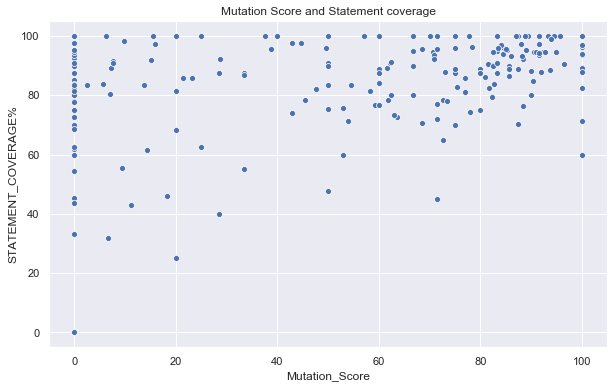

In [103]:
plt.figure(figsize=(10, 6))
ax = sns.scatterplot(x="Mutation_Score", y="STATEMENT_COVERAGE", data=data)
plt.ylabel("STATEMENT_COVERAGE%")
plt.title("Mutation Score and Statement coverage")

##### Corelation:

In [104]:
data[['Mutation_Score','STATEMENT_COVERAGE']].corr(method ='spearman')

,Mutation_Score,STATEMENT_COVERAGE
Mutation_Score,1.000000,0.494352
STATEMENT_COVERAGE,0.494352,1.000000


The rationale is that test suites with higher Statement coverage show better test suite effectiveness.

#### 2. Metric 3 and 2
Mutation Score and Branch Coverage

Text(0.5, 1.0, 'Mutation Score and Branch Coverage')

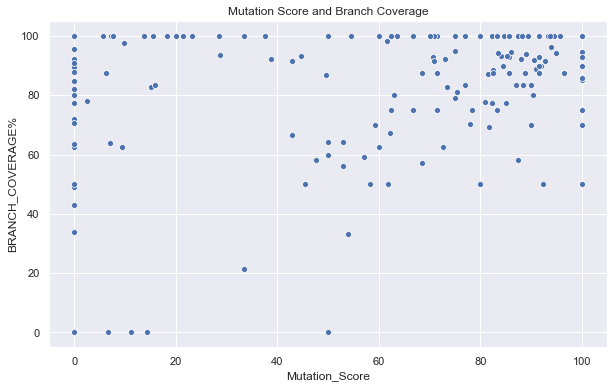

In [105]:
plt.figure(figsize=(10, 6))
ax = sns.scatterplot(x="Mutation_Score", y="BRANCH_COVERAGE", data=data)
plt.ylabel("BRANCH_COVERAGE%")
plt.title("Mutation Score and Branch Coverage")

Corelation:

In [106]:
data[['Mutation_Score','BRANCH_COVERAGE']].corr(method ='spearman')

,Mutation_Score,BRANCH_COVERAGE
Mutation_Score,1.000000,0.307149
BRANCH_COVERAGE,0.307149,1.000000


The rationale is that test suites with higher Branch coverage show better test suite effectiveness.